In [2]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [15]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
x = df.drop(columns=['sepal length (cm)', 'sepal width (cm)', 'target'])
x

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

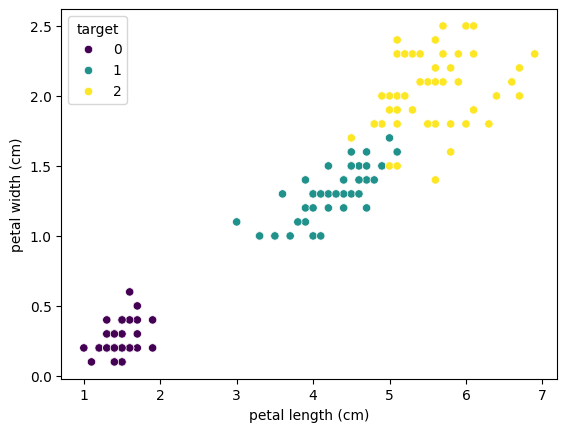

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sns.scatterplot(x=x['petal length (cm)'], y=x['petal width (cm)'], hue=df['target'], palette='viridis')

/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


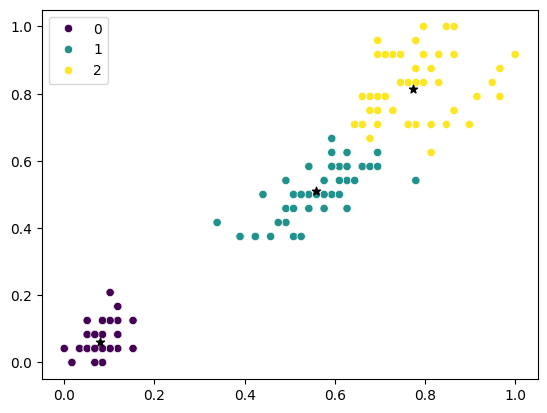

In [56]:
model = KMeans(n_clusters=3)
scaler = MinMaxScaler()
std_x = scaler.fit_transform(x)

result = model.fit_predict(std_x)
 
sns.scatterplot(x=std_x[:, 0], y=std_x[:, 1], hue=result, palette='viridis')
centroid = model.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', color='k')

/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

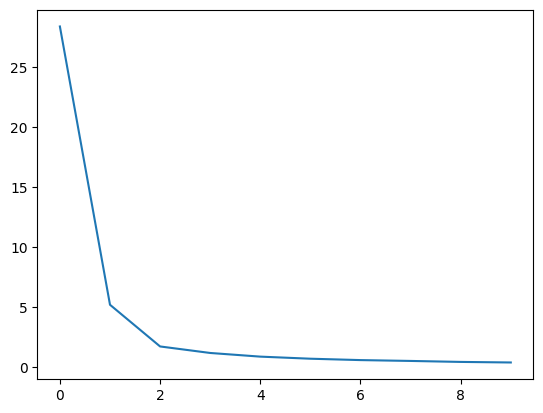

In [34]:
clusters = []
for i in range(1, 11):
    m = KMeans(n_clusters=i)
    m.fit_predict(std_x)
    clusters.append(m.inertia_)
plt.plot(clusters)

In [53]:
from sklearn.metrics import silhouette_score
df['clusters'] = result

model.score(std_x, iris.target)

-1.7018746881920972